<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch13_Estimations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch13 - Notebook : Estimations**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import log, exp, pi, sqrt, factorial

## **1. Comparaison de deux estimateurs du paramètre $\lambda$ d'une loi exponentielle**

On sait que si $X$ suit une loi exponentielle de paramètre $\lambda$, 

on a $E(X) = \frac{1}{\lambda}$ et $ V(X) = \frac{1}{\lambda^2}$

Ainsi, si on effectue un échantillon de valeurs selon une loi exponentielle de paramètre $\lambda$, la moyenne et la variance de l'échantillon seront deux estimateurs (c'est-à-dire des fonctions) de  $\lambda$.

Pour retrouver une approximation de la valeur de $\lambda$ à partir des résultats des échantillons, il faudra inverser le 1<sup>er</sup> et inverser la racine du 2<sup>nd</sup>.





* **Rappel : un procédé de simulation d'une loi exponentielle à connaître**

Si U suit une loi $U_{[0 ; 1]}$, alors $X = -\frac{1}{\lambda} log(1 - U)$ suit une loi $E(\lambda)$. (Procédé d'inversion de la fonction de répartition).


* **exemple : $n = 1000$ simulations d'une loi exponentielle de paramètre $\lambda = 3$**

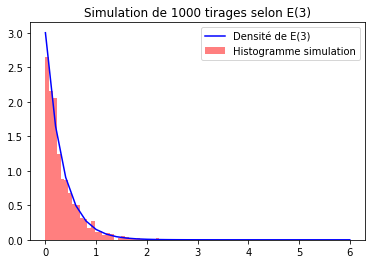

In [ ]:
n = 1000
lbda = 3

X = [-1/lbda * log( 1 - rd.random()) for _ in range(n)]   # Simulation de la loi exponentielle par inversion de sa fonction de répartition

X_Omega = np.linspace(0,2*lbda, 31)     # L'univers étant infini, on le limite à 2 fois l'espérance, ce qui est grandement suffisant
                                        # compte tenu de la décroissance rapide de la fonction de densité.

# histogramme
plt.hist(X, 30, color = 'red', alpha = 0.5, density ='True', label = "Histogramme simulation")

# densité de la loi exponentielle
Y = [lbda * exp(-lbda * x) for x in X_Omega ]
plt.plot(X_Omega,Y, color = 'blue', label = "Densité de E("+str(lbda)+")")

plt.legend()
plt.title("Simulation de "+str(n)+" tirages selon E("+str(lbda)+")")
plt.show()

* **N simulations de taille n selon la loi exponentielle, moyennes et variances des échantillons**

In [ ]:
lbda = 3
N = 25000
n = 50

moyennes = []
variances = []

for k in range(N):
    
    X = [-1/lbda * log( 1 - rd.random()) for _ in range(n)]   # Simulation de la loi exponentielle par inversion de sa fonction de répartition

    Y = np.mean(X)                                  # Estimation de Lambda par la moyenne de l'échantillon
    moyennes.append(1/Y)                            # stockage dans une liste du lambda estimé (1/E(X))

    Z = np.var(X)                                   # Estimation de lambda par la variance de l'échantillon
    variances.append(1/sqrt(Z))                     # stockage dans une liste du lambda estimé (1/sqrt(E(X)))
 


* **Représentations graphiques (histogrammes) des espérances et variances obtenues dans les N échantillons**

Estimations du paramètre d'une loi exponentielle


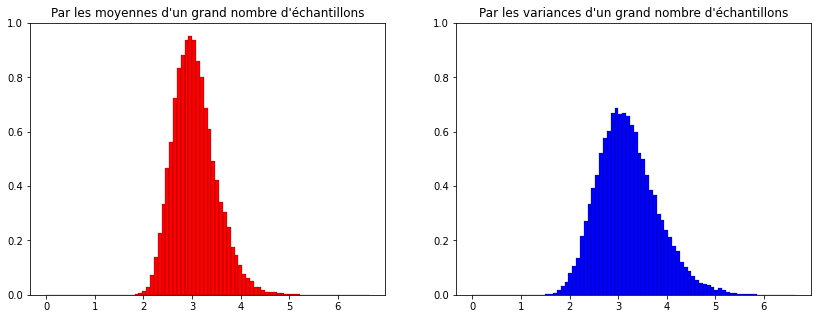

In [ ]:
fig = plt.figure(figsize =(14,5))
print("Estimations du paramètre d'une loi exponentielle")

bins=np.linspace(0,max(max(moyennes),max(variances)), 85)   # classes pour l'histogramme : même échelle dans les deux sous-fenêtres

plt.subplot(1,2,1)                                          # positionnement dans la bonne sous-fenêtre
# Histogramme des moyennes de l'échantillon
plt.hist(moyennes,bins=bins, histtype='bar', color='red', rwidth=1, edgecolor = 'black', linewidth = 0.2, density = True)
plt.title("Par les moyennes d'un grand nombre d'échantillons")
plt.ylim(0,1)

plt.subplot(1,2,2)                                          # positionnement dans la bonne sous-fenêtre
# Histogramme des variances de l'échantillon
plt.hist(variances,bins=bins, histtype='bar', color='blue', rwidth=1, edgecolor = 'black', linewidth = 0.2, density = True)
plt.title("Par les variances d'un grand nombre d'échantillons")
plt.ylim(0,1)

plt.show()

On observe que les deux estimateurs donnent des résultats conformes aux attendus, avecc des répartitions **normales** (Gaussiennes) autour du paramètre estimé.

Le 1<sup>er</sup> est bien centré sur la valeur de $\lambda$ (**"sans biais"**), et peu étendu (**"risque quadratique** assez faible).

Le 2<sup>nd</sup> semble légèrement biaisé, et plus étendu (**"risque quadratique** plus élevé).

Le 1<sup>er</sup> estimateur, obtenu par la moyenne des échantillon, est donc meilleur que l'autre.


In [ ]:
print('Paramètre estimé : lambda = ', lbda)
print('---')
print('Moyenne des estimations de lambda obtenues par les moyennes des échantillons : ' + str(np.mean(moyennes)))
print('Variance des estimations de lambda obtenues par les moyennes des échantillons : ' + str(np.var(moyennes)))
print('---')

print('Moyenne des estimations de lambda obtenues par les variances des échantillons : ' + str(np.mean(variances)))
print('Variance des estimations de lambda obtenues par les variances des échantillons : ' + str(np.var(variances)))

Paramètre estimé : lambda =  3
---
Moyenne des estimations de lambda obtenues par les moyennes des échantillons : 3.05809453441616
Variance des estimations de lambda obtenues par les moyennes des échantillons : 0.1959911609892316
---
Moyenne des estimations de lambda obtenues par les variances des échantillons : 3.2003917432014806
Variance des estimations de lambda obtenues par les variances des échantillons : 0.385803169300538


Lorsque l'on multiplie le 2<sup>nd</sup> estimateur par $\left( \frac{n-1}{n} \right )^2$, il semble qu'on le débiaise :




In [ ]:
((n-1)/n)**2 * np.mean(variances)

3.0736562301707018

* **convergence de ces deux estimateurs :**

On fait augmenter le n...


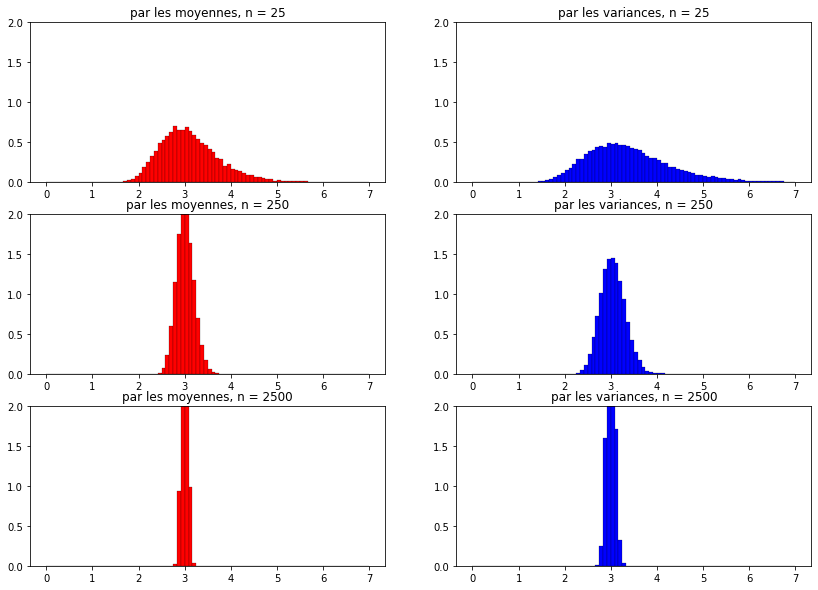

In [ ]:
# ! calcul long (1'30) !

liste_n = [25, 250 , 2500]
bins=np.linspace(0,7, 85)   # classes pour l'histogramme : même échelle dans les deux sous-fenêtres

fig = plt.figure(figsize =(14,10))
for j in range(len(liste_n)) :
    moyennes = []
    variances = []

    for k in range(N):
        
        X = [-1/lbda * log( 1 - rd.random()) for _ in range(liste_n[j])]   # Simulation de la loi exponentielle par inversion de sa fonction de répartition

        Y = np.mean(X)                                  # Estimation de Lambda par la moyenne de l'échantillon
        moyennes.append(1/Y)                            # stockage dans une liste du lambda estimé (1/E(X))

        Z = np.var(X)                                   # Estimation de lambda par la variance de l'échantillon
        variances.append(1/sqrt(Z))                     # stockage dans une liste du lambda estimé (1/sqrt(E(X)))

    plt.subplot(3,2,j*2 + 1 )                                  # positionnement dans la bonne sous-fenêtre
    # Histogramme des moyennes de l'échantillon
    plt.hist(moyennes,bins=bins, histtype='bar', color='red', rwidth=1, edgecolor = 'black', linewidth = 0.2, density = True)
    plt.title("par les moyennes, n = "+str(liste_n[j]))
    plt.ylim(0,2)

    plt.subplot(3,2,j*2 + 2)                                  # positionnement dans la bonne sous-fenêtre
    # Histogramme des variances de l'échantillon
    plt.hist(variances,bins=bins, histtype='bar', color='blue', rwidth=1, edgecolor = 'black', linewidth = 0.2, density = True)
    plt.title("par les variances, n = "+str(liste_n[j]))
    plt.ylim(0,2)

plt.show()

On constate clairement la convergence des deux estimateurs : plus n augmente, moins les résultats sont dispersés.

On a convergence vers la loi certaine égale à $\lambda$ (convergence en probabilités).

# **Estimation par intervalle de confiance  génération d'intervalles**


Nous allons ici générer 160 expériences consistant en 100 tirages d'une loi de Bernoulli de paramètre $p$ = 0,45 (ce qui revien à un tirage binomial de paramètres $n=160$ et $p = 0.45$.


$n = 160 > 30$ 

$ n . p = 160 \times 0.45 = 72 > 15$

$n . p .q = 160 \times 0.45 \times 0.55 = 39.6 > 5$ ... donc on sait que le comportement des tirages aléatoires va suivre une loi normale, d'espérance $\mu = 72$ et de variance $\sigma^2 = 39.6$.

 
On connaît un intervalle de confiance au niveau de confiance de $(\alpha)$ : $\left [m  -  \frac{\Phi^{-1 }(2 \alpha - 1 )}{2 \sqrt{n}} ;  m  +  \frac{\Phi^{-1 }(2 \alpha - 1)}{2 \sqrt{n}} \right ]$ où m est le centre de l'intervalle aléatoire.

Si on prend $\alpha = 5\%$ (niveau de risque), le niveau de confiance est donc de $95\%$.Or $\Phi^{-1} (0.975) \approx 1.96$ et $\frac{1.96}{2} \approx 1$, 

On pourra alors observer si la moyenne attendue de 0,45 figure dans l'intervalle de confiance simplifié des valeurs tirées : 

$\left [ m - \frac{1}{\sqrt {n}} ;  m + \frac{1}{\sqrt {n}} \right ] $ (un tout petit peu plus étroit que l'intervalle exact, donc on devrait perdre un peu du niveau de confiance...).



In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import abs, sqrt

In [ ]:
N = 160     # nombe d'expériences
p = 0.45    # probabilité de succès Bernoulli
n = 100     # nombre de répétitions par expérience

U = 1* (rd.rand(N,n) < p)

B = [np.mean(U[i]) for i in range(len(U))] # On fait la moyenne pour chaque ligne


Proportion d'intervalles non conformes : 4.375%.


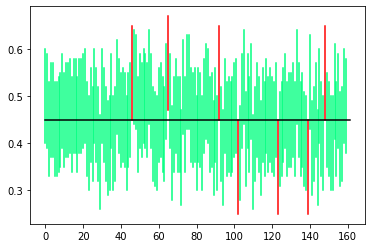

In [ ]:
# tracé des intervalles obtenus
nn = 0
for i in range(N) :
    if abs(B[i]-p) <= 1/sqrt(n) :
        plt.plot([i, i], [B[i]-1/sqrt(n) , B[i]+1/sqrt(n)], color = "springgreen")   # intervalle conforme, on trace le segment intervalle de confiance en vert
    else :
        plt.plot([i, i], [B[i]-1/sqrt(n) , B[i]+1/sqrt(n)],  color = "red")    # intervalle non conforme, tracé en rouge
        nn = nn + 1     # comptage des intervalles non conformes

plt.plot([0,  N+1], [p,  p], color = "black")                                  # tracé de la moyenne attendue

plt.xlim = (0, min(B)-1/sqrt(n)-0.01)
plt.ylim = (N, max(B)+1/sqrt(n)+0.01)

print("Proportion d'intervalles non conformes : " + str(nn/N*100)+"%.")
plt.show()


**Commentaires  :**

Ici, sur 160 tirages, 7 environ donnent un intervalle de confiance erroné. Le niveau de confiance étant de 95% (niveau de risque de 5%), 5% de 160 donne 8 : on s'attend à ce qu'environ 8 expériences amènent à déclarer un intervalle de confiance de l'espérance non conforme. 

Il arrive bien sûr que l'on dépasse les 5% attendus, mais en moyenne, grâce au Théorème Central Limite, les échantillons se répartissent de manière "normale".

# **Méthode de Monte Carlo**

Les méthodes de Monte-Carlo consisye en l'emploi de méthodes **"*stochastiques*"**, c'est-à-dire faisant usage de procédés aléatoires pour **estimer** une grandeur **"*déterministe*"**, c'est-à-dire qui n'en dépend pas du tout.

C'est la Loi des Grands Nombres en action (Théorème Limite Central ), assortie d'une estimation de la qualité de la convergence : le TCL amène non seuleent une garantie de convergence, mais donne une majoration de la variabilité du résultat.

## **Exemple**

Soit à calculer l'intégrale 
$$I = \int_0^1 \left(ln(t) \right )^2 dt$$

N'importe quel individu normalement constitué se dit « Deux petites Intégrations Par Parties et le tour est joué ! » ... Essayez pour voir... avec quelques précautions quand-même puisqu'il s'agit d'une intégrale impropre.


Le spécialiste des méthodes stochastiques, quant à lui, se dit « Cette intégrale est la moyenne de la fonction intégrée entre 0 et 1 !. 

"Moyenne" ? "entre 0 et 1" ? Il suffit de faire un certain nombre de tirages aléatoires entre 0 et 1, d'en prendre la logarithme, d'élever au carré, et de faire la moyenne des résultats obtenus, et on aura une approximation de $I$...»

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import log

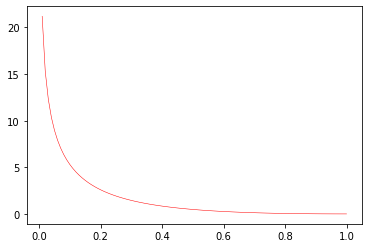

In [ ]:
xx = np.linspace(0.01,1,100)
yy = [(np.log(x))**2 for x in xx]
plt.plot(xx,yy, color = 'red', linewidth = 0.5)
plt.show()

In [ ]:
I = np.mean([log(rd.random())**2 for _ in range(10000)])
I

1.9832879183265633

Cette unique ligne de calcul (**à décortiquer**...), éxécutée plusieurs fois, avec un échantillon de 10000 tirages aléatoires laisse à penser que $I$ vaut à peu près 2, avec une précision de l'ordre du 100<sup>ème</sup> (remarque : $\frac{1}{100} = \frac{1}{\sqrt {10000}}$).

* **Parenthèse** : 

le module *SymPy* autorise le calcul symbolique, dont le calcul des intégrales impropres, il est remarquable, mais que de code à taper pour calculer $I$ !

In [ ]:
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
t, I, f, epsilon = sp.symbols('t, I, f, epsilon') # Bornage inférieur, intégrale impropre

f = (sp.log(t))**2
     
I = sp.limit(sp.integrate(f,(t,epsilon,1)), epsilon, 0) 
display(I)

... intégrale impropre sans souci pour *SymPy*

In [ ]:
I = sp.integrate(f,(t,0,1))
I

**Récapitulatif de la méthode**

Ainsi, les méthodes de Monte Carlo reviennent donc toujours à remplacer le calcul fastidieux de l'espérance de la composée d'une certaine fonction $g$ et d'une certaine variable aléatoire $Y$, $E \left ( g(Y) \right)$, par le calcul de la **moyenne** des valeurs prises par la simulation d'un échantillon : 

$$\overline{ g_N} = \frac{1}{N} \sum_{k=1}^N g \left ( Y_k \right )$$ où les $\left ( Y_k \right )_{k \in [[1,N]]}$ sont N variables aléatoires, **i**ndépendantes et **i**dentiquement **d**istribuées (***iid***), suivant la même loi que $Y$ (l'échantillon).

**Garantie d'approximation et qualité de convergence**

Si l'on pose $\sigma_g = \sqrt {V \left ( g(Y) \right )}$, écart-type de $Y$, on a d'après le **Théorème Limite Central** :

$\displaystyle \lim_{ N \to +\infty} P \left ( \left [ \left | \overline {g_N} - E \left ( g(Y)\right ) \right | \leqslant 1.96 \frac {\sigma^2_g}{\sqrt N} \right ] \right ) = 95\%$ (*)

On constate que la précision est garantie en $\pm \frac {\sigma^2_g}{\sqrt N}$, quantité appelée **"erreur standard"** par les statisticiens.

Le petit souci est que, dans la plupart des cas, l'écart-type de $g(Y)$ n'est pas connu. On le remplace alors dans le calcul par l'écart-t-ype empirique constaté dans l'échantillon, valeur estimée : on pose donc
$$\widehat {\sigma_g }=\sqrt {\frac{1}{N-1} \sum_{k=1}^N \ \left ( Y_k  - \overline {g(Y)}\right ) ^2 } $$ (estimateur sans biais de l'écart-type de l'échantillon, donc calculé sur les données simulées, qui vient remplacer l'écart-type théorique dans la relation (*).






## **Application : calcul d'une valeur approchée de $\pi$ par 3 estimateurs différents :**

Chacune des intégrales suivantes induit un estimateur de $\pi$ :
(sauriez-vous expliquer la 2<sup>ème</sup> ?)


$$1°) \pi = \int_0^1 f(x) dx, ~avec~ f(x) = \frac{2}{\sqrt {1-x^2}}$$
$$2°) \pi = 4 . \int_0^1 g(x) dx, ~avec~g(x) = \sqrt {1-x^2}$$
(Dans cette 2<sup>ème</sup> formule, on reconnaît l'équation du quart de cercle.)

3°) ou grâce à une méthode de Monte-Carlo particulière, que l'on a déjà rencontrée, qui s'appelle la **méthode de rejet** : on va tirer des points au hasard dans le carré de côté 1, la proportion de ces points qui se trouveront dans le quart de cercle de rayon 1 (ce qui nécessite pour chaque point deux appels au générateur de nombres aléatoires, pour l'abscisse et l'ordonnée) donnera une approximation de $\frac{\pi}{4}$ : on garde pour cela les points dont l'ordonnée est inférieure à $\sqrt {1-x^2}$ (autrement dit pour lesquels $\sqrt {x^2 + y^2} \geqslant 1$) et on rejette les autres.

Le 3<sup>ème</sup> estimateur necessitant deux tirages aléatoires, nous allons effectuer deux fois plus de tirages pour les deux premiers estimateurs, afin de pouvoir les comparer "à moyens constants"...

Pour comparer ces estimateurs, nous allons comparer, comme l'indique le **Théorème Limite Central**

In [ ]:
import numpy as np
from math import pi, sqrt, inf
import numpy.random as rd
import matplotlib.pyplot as plt

In [ ]:
def dispMMC(X, c, i, vartheo, fact) :
    '''Fonction d'affichage uniquement des résultats de la méthode de MonteCarlo'''
    # Entrées 
    # X : un vecteur ou une matrice de nombres réels (pas de booléens) 
    # c, vartheo : des réels positifs
    # i : un entier naturel 
    # fact : un entier naturel valant 1 ou 2 
    print('-------------------------------------------')
    print("Estimée : "+ str(np.mean(X)))
    print("Ecart absolu : "+ str(np.abs(np.mean(X)-pi)))
    print("Précision théorique : "+ str(c/sqrt(i)))
    print("Précision réalisée : "+ str(2*np.std(X)/sqrt(fact*i))) # np.std : écart-type
    print("estimée de la variance : "+ str(np.var(X))+ " vs. valeur théorique : "+ str(vartheo))


* **Simulation des 3 estimateurs**

In [ ]:
N = 1000
print("N = "+ str(N))
W = rd.random(2*N)
U = W[:N]
V = W[N:2*N]

# 1er estimateur
dispMMC(2 /(1-W**2)**(1/2), inf, N, inf, 2)

# 2ème estimateur
dispMMC(4*((1-W**2)**(1/2)), 1.27, N, 0.8, 2)

# 3ème estimateur
dispMMC(4*((U**2+V**2 <= 1)+0.), 3.29, N, 2.7, 1)


N = 1000
-------------------------------------------
Estimée : 3.1937606543262294
Ecart absolu : 0.05216800073643624
Précision théorique : inf
Précision réalisée : 0.21307457185198178
estimée de la variance : 22.70038658495267 vs. valeur théorique : inf
-------------------------------------------
Estimée : 3.1570064516328813
Ecart absolu : 0.015413798043088178
Précision théorique : 0.04016092628413842
Précision réalisée : 0.039616368119708104
estimée de la variance : 0.7847283114981125 vs. valeur théorique : 0.8
-------------------------------------------
Estimée : 3.156
Ecart absolu : 0.014407346410207023
Précision théorique : 0.10403893501953969
Précision réalisée : 0.10322139313146284
estimée de la variance : 2.6636640000000003 vs. valeur théorique : 2.7


* **Visualisation de la qualité des estimateurs par leur variance**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


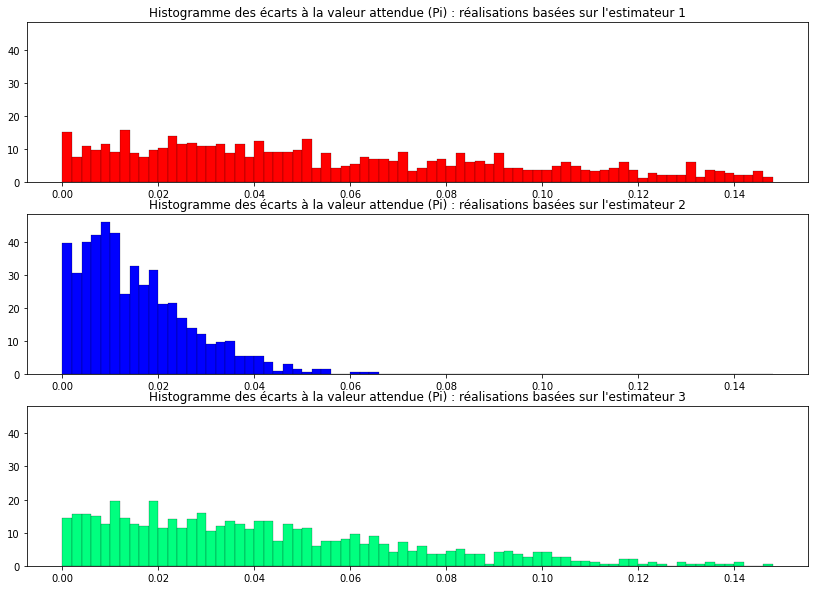

In [ ]:
plt.figure(figsize =(14,10))              
ecarts1 = []
ecarts2 = []
ecarts3 = []

for k in range(N) :  
    W = rd.random(2*N)
    U = W[:N]
    V = W[N:2*N]  
    ecarts1.append(abs(pi-np.mean(2/(1-W**2)**(1/2))))
    ecarts2.append(abs(pi-np.mean(4*(1-W**2)**(1/2))))
    ecarts3.append(abs(pi-np.mean(4*((U**2+V**2 <= 1)+0.))))

ecarts = [ecarts1,ecarts2,ecarts3]

# realisations graphiques
titre=["estimateur 1", "estimateur 2" , "estimateur 3"]
couleurs = ['red','blue','springgreen']
bins = list(np.arange(0, 0.15, 0.002))

ax1 = plt.subplot(3,1,1)
for i in range(3) :
    if i == 0: 
        plt.subplot(3,1,i+1)
    else :       
        plt.subplot(3,1,i+1, sharey = ax1) # afin que les axes des ordonnées soient à la même échelle
    plt.hist(ecarts[i], bins, color = couleurs[i], density=True, edgecolor = 'black', linewidth = 0.2)
    plt.title("Histogramme des écarts à la valeur attendue (Pi) : réalisations basées sur l'" + str(titre[i]))
    

plt.show()

* **Commentaires :**

Pour le premier estimateur : grosse variabilité : la loi utilisée dans la méthode n'a pas de variance, l'approximation n'est donc absolument pas garantie.

Pour le second, il s'agit, comme attendu de la meilleure approximation : faible écart absolu, garanti par un faible écart-type.


Pour le dernier, l'approximation moyenne est assez correcte, mais la variabilité assez importante.